<h4>SENTIMENT ANALYSIS WITH NLP ON RESTAURANT REVIEWS DATASET</h4>

<h4>Import necessary libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Load Dataset from kaggle datasets <a href="https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews">https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews</a> </h4>

In [2]:
df=pd.read_table("Restaurant_Reviews.tsv")

In [3]:
df.sample(5)

,Review,Liked
290,Waited 2 hours & never got either of our pizza...,0
649,We won't be going back anytime soon!,0
339,There is nothing authentic about this place.,0
128,I wouldn't return.,0
488,"It was attached to a gas station, and that is ...",0


In [4]:
df.shape

(1000, 2)

In [5]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [6]:
#checking for null values
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
import nltk

<h4>Preprocessing text data</h4>

In [8]:
import re
from nltk.corpus  import stopwords
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def preprocess(review):
    #converting text to lower case
    str=' '.join(word.lower() for word in review.split())
    #Removing special characters
    x=''
    for i in str:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    #Remove stopwords
    y=[]
    for i in x.split():
        if i not in stopwords.words('english'):
            y.append(i)
       
    #Perform stemming
    s=[]
    for i in y:
        s.append(st.stem(i))
    finalstr=' '.join(s)
    text=re.sub(r"\s+",' ',finalstr).strip()
    return text
            

In [9]:
df['Review']=df['Review'].apply(preprocess)

In [10]:
df.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


In [11]:
X=df['Review']
y=df['Liked']

<h4>Splitting data into training and Testing sets</h4>

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Training Set:{X_train.shape},\nTesting Set:{X_test.shape}")

Training Set:(800,),
Testing Set:(200,)


<h4>TF-IDF Vectorization</h4>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(ngram_range=(1,2),max_features=2000)
X_train_tfidf=tfidf_vec.fit_transform(X_train)
X_test_tfidf=tfidf_vec.transform(X_test)

<h4>Logistic Regression Model</h4>

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)


LogisticRegression()

<h4>Model Evaluation</h4>

In [15]:
y_pred=model.predict(X_test_tfidf)

y_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [16]:
y_test[:5]

724    1
653    0
492    0
125    0
203    1
Name: Liked, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{acc:.2f}")

Model Accuracy:0.81


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.78      0.85      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



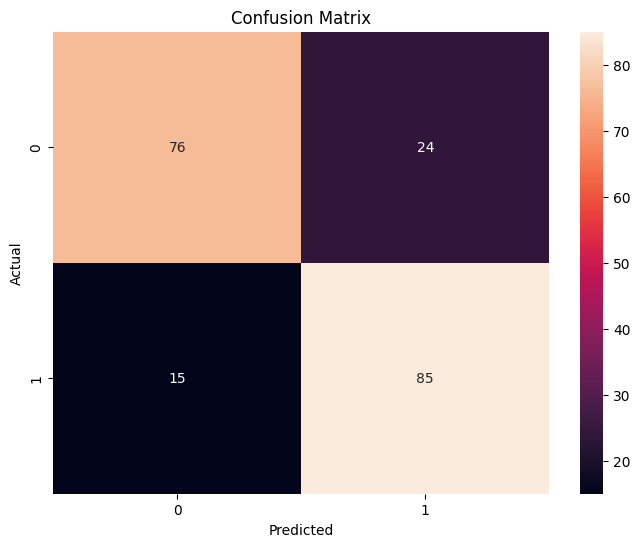

In [19]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
def predict(review):
    review_preprocessed=preprocess(review)
    review_tfidf=tfidf_vec.transform([review_preprocessed])
    prediction=model.predict(review_tfidf)
    return "Positive" if  prediction[0]==1 else "Negative"


<h4>Testing with New Reviews</h4>

In [21]:
Review=input("Enter Review:")
print("Sentiment:",predict(Review))
Review=input("Enter Review:")
print("Sentiment:",predict(Review))

Enter Review: Delicious food and great service!


Sentiment: Positive


Enter Review: Poor quality product, not worth the price.


Sentiment: Negative


<h4>CONCLUSIONS:</h4>
<h7>- Logistic Regrssion combined with TF-IDF achieves 81% accuracy,indicating effective and reliable performance in classifying customer reviews. </h7><br>
<h7>-TF-IDF vectorization successfully captured important word patterns</h7><br>
<h7>-The classification report shows good precision,recall and F1-score,showing that model is well-fitted.Some misclassifiications exist but overall performance is good</h7>
<br>
<h7>-This model can be used by businesses to analyze customer reviews,identify trends and make decisions to enhance services and products.</h7>
                                                                                                                                            